In [13]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.0 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.0 kB 409.6 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.0 kB 656.4 kB/s eta 0:00:01
   ----------------------------- -------- 194.6/250.0 kB 841.6 kB/s eta 0:00:01
   -------------------------------------- 250.0/250.0 kB 959.0 kB/s eta 0:00:00


In [14]:
import matplotlib.pyplot as plt
import psycopg2 as psy
import pandas as pd

from datetime import datetime as dt

def sql_to_pd(query):
    '''
    Функция стучится в базу данных и обрабатывает указанный в аргументе запрос.
    Затем преобразует полученные данные в датафрейм и возвращает его.
    '''
    try:
        # Connect to an existing database
        connection = psy.connect(user="postgres",
                                  password="",
                                  host="127.0.0.1",
                                  port="5432",
                                  database="postgres")
        # Create a cursor to perform database operations
        cursor = connection.cursor()
        cursor.execute(query)
        colnames = [desc[0] for desc in cursor.description]
        record = cursor.fetchall()
        # Create a dataframe with the data from a database
        data_frame = pd.DataFrame(record, columns=colnames)
        return data_frame
    except Exception as e:
        print("Error while connecting to PostgreSQL", e)
    finally:
        if (connection):
            cursor.close()
            connection.close()

# 1. Постройте круговую диаграмму, которая показывает количество сотрудников по странам

In [2]:
df_employees = sql_to_pd('SELECT * FROM employees;')
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        9 non-null      int64  
 1   last_name          9 non-null      object 
 2   first_name         9 non-null      object 
 3   title              9 non-null      object 
 4   title_of_courtesy  9 non-null      object 
 5   birth_date         9 non-null      object 
 6   hire_date          9 non-null      object 
 7   address            9 non-null      object 
 8   city               9 non-null      object 
 9   region             5 non-null      object 
 10  postal_code        9 non-null      object 
 11  country            9 non-null      object 
 12  home_phone         9 non-null      object 
 13  extension          9 non-null      object 
 14  photo              9 non-null      object 
 15  notes              9 non-null      object 
 16  reports_to         8 non-null 

In [3]:
pie_data = df_employees.groupby('country').agg({'first_name': 'count'}).reset_index()
pie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     2 non-null      object
 1   first_name  2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 164.0+ bytes


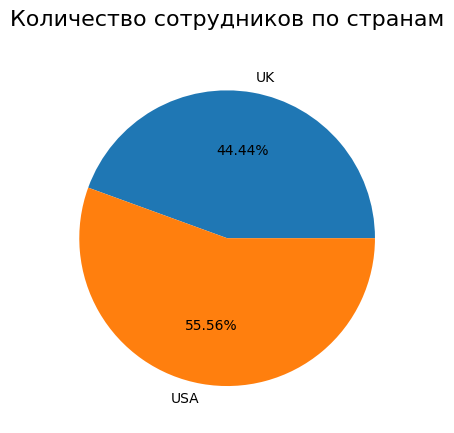

In [4]:
plt.pie(pie_data['first_name'], labels=pie_data['country'], autopct='%1.2f%%')

plt.title(
    label="Количество сотрудников по странам",
    fontdict={"fontsize":16},
    pad=20
)

plt.show()

# 2. Посчитайте стаж работы сотрудников (От года найма)

In [5]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        9 non-null      int64  
 1   last_name          9 non-null      object 
 2   first_name         9 non-null      object 
 3   title              9 non-null      object 
 4   title_of_courtesy  9 non-null      object 
 5   birth_date         9 non-null      object 
 6   hire_date          9 non-null      object 
 7   address            9 non-null      object 
 8   city               9 non-null      object 
 9   region             5 non-null      object 
 10  postal_code        9 non-null      object 
 11  country            9 non-null      object 
 12  home_phone         9 non-null      object 
 13  extension          9 non-null      object 
 14  photo              9 non-null      object 
 15  notes              9 non-null      object 
 16  reports_to         8 non-null 

In [18]:
now = dt.now().date()
now_timestamp = pd.Timestamp(now)

df_employees['hire_date'] = pd.to_datetime(df_employees['hire_date'])
work_time = df_employees[['first_name', 'hire_date']].copy()

work_time['years_in_company'] = (((now_timestamp - work_time['hire_date']).dt.days)/365.25).round(2)
work_time.to_excel('output.xlsx')

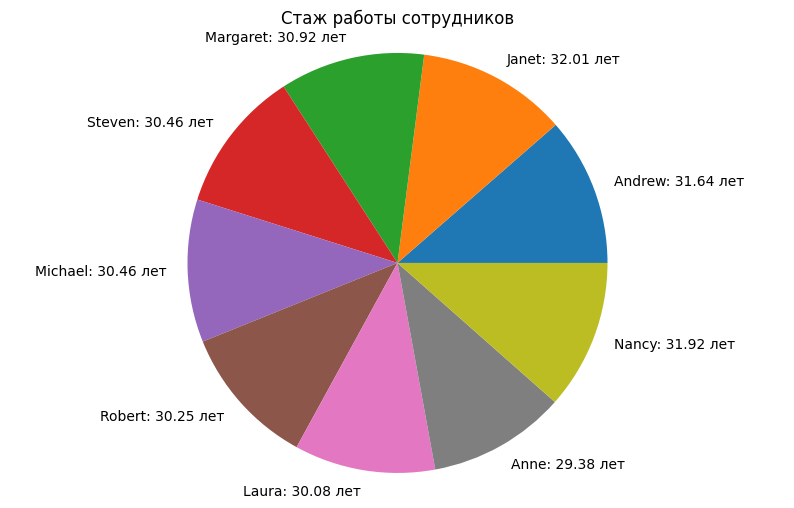

In [7]:
plt.figure(figsize=(10, 6))
plt.pie(work_time['years_in_company']
        , labels=[f"{name}: {years:.2f} лет" for name, years in zip(work_time['first_name'], work_time['years_in_company'])], autopct=''
       )
plt.title('Стаж работы сотрудников')
plt.axis('equal')
plt.show()

# 3. Посчитайте возраст сотрудников (От года рождения)

In [19]:

# now = dt.now().date()
# now_timestamp = pd.Timestamp(now)

df_employees['birth_date'] = pd.to_datetime(df_employees['birth_date'])
age_employees = df_employees[['first_name', 'birth_date']].copy()

age_employees['age'] = (((now_timestamp - age_employees['birth_date']).dt.days)/365.25).round(2)
age_employees

# 4. Посчитайте средний возраст сотрудников

In [10]:
(age_employees['age'].mean()).round(2)

68.07

# 5. Выгрузите таблицу с созданными данными из заданий 2 и 3 в эксель, и приложите в задании. (Загрузите сюда) (Метод to_excel)

In [21]:
excel_table = work_time.merge(age_employees)
excel_table.to_excel('output.xlsx')